In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'train.csv', 'labels.csv', 'sample_submission.csv']


['test', 'train', 'train.csv', 'labels.csv', 'sample_submission.csv']
tag        705
culture    398
Name: attribute_type, dtype: int64


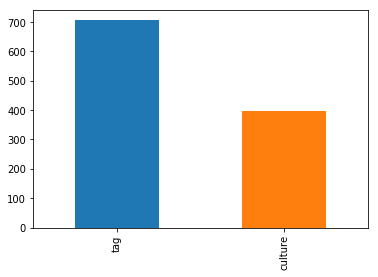

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 500

import os
print(os.listdir("../input"))

import glob
import json
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import gc

%matplotlib inline

train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/sample_submission.csv")
labels_df = pd.read_csv("../input/labels.csv")


labels_df["attribute_type"] = labels_df.attribute_name.apply(lambda x: x.split("::")[0])
print(labels_df["attribute_type"].value_counts())
labels_df.attribute_type.value_counts().plot.bar()

In [75]:
train_attr_ohot = np.zeros((len(train_df), len(labels_df)), dtype=int)
for idx, attr_arr in enumerate(train_df.attribute_ids.str.split(" ").apply(lambda l: list(map(int, l))).values):
    train_attr_ohot[idx, attr_arr] = 1
names_arr = labels_df.attribute_name.values
train_df["attribute_names"] = [", ".join(names_arr[arr == 1]) for arr in train_attr_ohot]
train_df["attr_num"] = train_attr_ohot.sum(axis=1)
train_df["culture_attr_num"] = train_attr_ohot[:, :398].sum(axis=1)
train_df["tag_attr_num"] = train_attr_ohot[:, 398:].sum(axis=1)

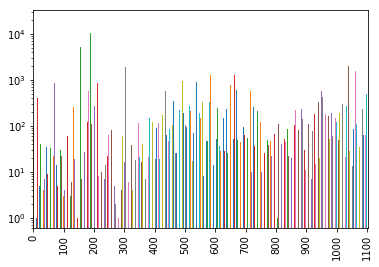

In [94]:
labels_df["frequency"] = train_attr_ohot.sum(axis=0)

ax = labels_df.frequency.plot.bar(logy=True,)
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::100])
ax.xaxis.set_ticklabels(ticklabels[::100])
ax.figure.show()



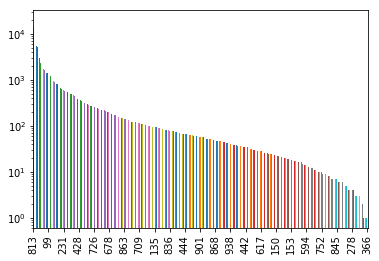

In [108]:
labels_df_sort = labels_df.sort_values(by=["frequency","attribute_id"], ascending=[False,True])
ax = labels_df_sort.frequency.plot.bar(logy=True,)
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::50])
ax.xaxis.set_ticklabels(ticklabels[::50])
ax.figure.show()



In [105]:
labels_df.head()

,attribute_id,attribute_name,attribute_type,frequency
0,0,culture::abruzzi,culture,18
1,1,culture::achaemenid,culture,100
2,2,culture::aegean,culture,14
3,3,culture::afghan,culture,3
4,4,culture::after british,culture,13
